In [35]:
import pandas as pd
import numpy as num_paths
import matplotlib.pyplot as psnrResault
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from matplotlib import pyplot as plt

In [36]:
df=pd.read_csv("dataTest.csv")

In [37]:
df=pd.DataFrame(df)
df.head()

,host,avgRTT,packetLoss,latency,hopCount,bandwidth,yukOrani,psnr,ssim_first,ssim_second,type,server
0,h1,1898.137,0.0,66,4,3000000,2011.425000,31.225948,0.985150,18.282783,3,h10
1,h2,2240.660,0.0,44,3,3000000,1859.161290,31.225948,0.985150,18.282674,3,h14
2,h3,2196.294,0.0,40,2,3000000,9084.620155,22.700112,0.956348,13.599976,3,h14
3,h4,1298.732,0.0,60,3,3000000,25815.963636,22.301604,0.960533,14.037636,3,h14
4,h5,338.105,0.0,92,4,3000000,37246.273632,22.510259,0.958593,13.829213,3,h10


In [38]:
df.dropna(inplace=True)
df.describe().T

,count,mean,std,min,25%,50%,75%,max
avgRTT,281.0,1.232612e+03,1.101779e+03,1.529400e+02,3.240470e+02,5.744900e+02,2.205335e+03,4.744949e+03
packetLoss,281.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
latency,281.0,7.437011e+01,3.445243e+01,1.300000e+01,5.300000e+01,7.400000e+01,9.000000e+01,3.580000e+02
hopCount,281.0,3.071174e+00,1.032640e+00,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,8.000000e+00
bandwidth,281.0,4.003559e+06,1.001778e+06,3.000000e+06,3.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06
yukOrani,281.0,3.127766e+04,2.685228e+04,4.751573e+02,9.002323e+03,2.581596e+04,4.484714e+04,1.770201e+05
psnr,281.0,3.302203e+01,1.619637e+01,1.267172e+01,2.124576e+01,2.279840e+01,5.505260e+01,5.506194e+01
ssim_first,281.0,9.112046e-01,1.305980e-01,5.138590e-01,9.014280e-01,9.607070e-01,9.997650e-01,9.997650e-01
ssim_second,281.0,1.961919e+01,1.235517e+01,3.132379e+00,1.006246e+01,1.405682e+01,3.628266e+01,3.628266e+01
type,281.0,3.000000e+00,0.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00,3.000000e+00


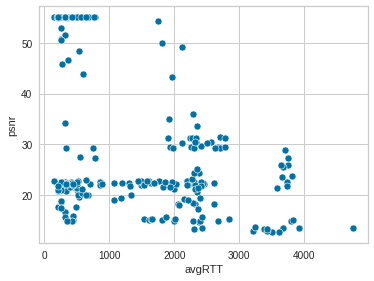

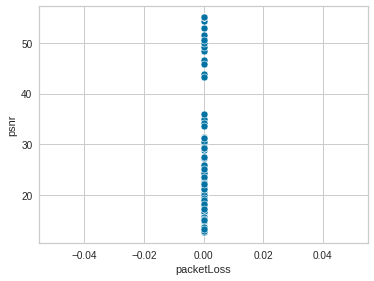

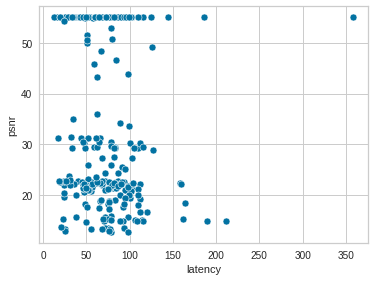

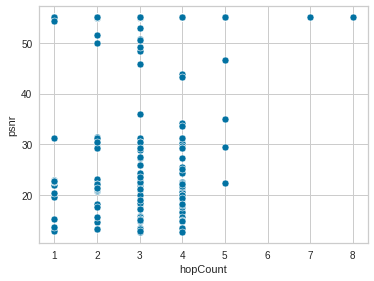

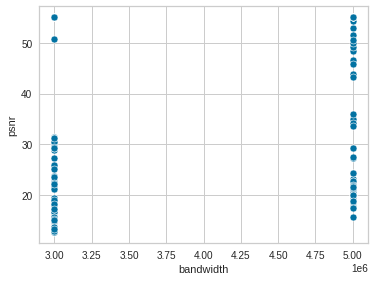

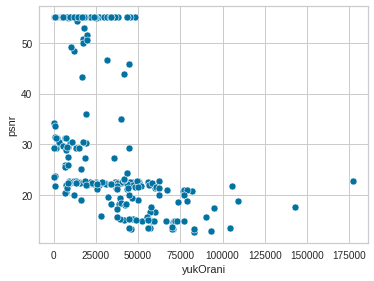

In [39]:
sayisal_veriler=["avgRTT","packetLoss","latency","hopCount","bandwidth","yukOrani"]
for i,deger in enumerate(sayisal_veriler):
    plt.figure(figsize=(20,20))
    ax=plt.subplot(4,3,i+1)
    sns.scatterplot(x=deger,y="psnr",data=df)
    plt.show()

In [40]:
# sns.displot(df)

In [41]:
y=df["ssim_first"]
x=df.drop(["host","ssim_first","ssim_second","type","psnr","server"],axis="columns")
y


0      0.985150
1      0.985150
2      0.956348
3      0.960533
4      0.958593
         ...   
277    0.723552
278    0.619543
279    0.628608
280    0.579837
281    0.552046
Name: ssim_first, Length: 281, dtype: float64

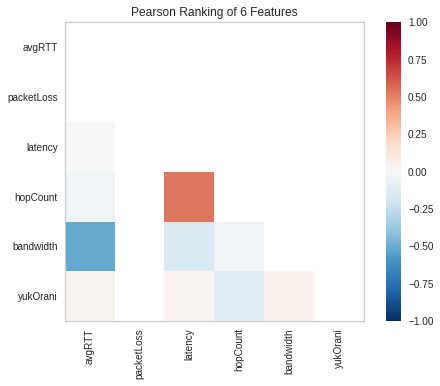

<AxesSubplot:title={'center':'Pearson Ranking of 6 Features'}>

In [42]:
from yellowbrick.features import Rank2D
visualizer=Rank2D(algorithm="pearson")
visualizer.fit(x,y)
visualizer.transform(x)
visualizer.show()

In [43]:
x.describe().T

,count,mean,std,min,25%,50%,75%,max
avgRTT,281.0,1.232612e+03,1.101779e+03,1.529400e+02,3.240470e+02,5.744900e+02,2.205335e+03,4.744949e+03
packetLoss,281.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
latency,281.0,7.437011e+01,3.445243e+01,1.300000e+01,5.300000e+01,7.400000e+01,9.000000e+01,3.580000e+02
hopCount,281.0,3.071174e+00,1.032640e+00,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,8.000000e+00
bandwidth,281.0,4.003559e+06,1.001778e+06,3.000000e+06,3.000000e+06,5.000000e+06,5.000000e+06,5.000000e+06
yukOrani,281.0,3.127766e+04,2.685228e+04,4.751573e+02,9.002323e+03,2.581596e+04,4.484714e+04,1.770201e+05


In [59]:
from sklearn.model_selection import train_test_split
XTrain,XTest,yTrain,yTest=train_test_split(x,y,test_size=0.4, random_state=42)

In [60]:
from sklearn.linear_model import LinearRegression
LogModel=LinearRegression()
LogModel.fit(XTrain,yTrain)
tahmin=LogModel.predict(XTest)
from sklearn.metrics import r2_score
print(r2_score(yTest,tahmin))

0.5868136109271902


In [61]:
from sklearn.ensemble import RandomForestRegressor
for i in range(1,20,1):
    rand=RandomForestRegressor(max_depth=i,)
    rand.fit(XTrain,yTrain)
    tahminRand=rand.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,rand.predict(XTrain))} test: {r2_score(yTest,tahminRand)}")

max_depth : 1 --> score r2 : eğitim:0.4816961613687937 test: 0.5050727816961719


max_depth : 2 --> score r2 : eğitim:0.7812097763155446 test: 0.7744008593166033
max_depth : 3 --> score r2 : eğitim:0.8746600850425642 test: 0.8224655767142445
max_depth : 4 --> score r2 : eğitim:0.9279123825979811 test: 0.8397074604837961
max_depth : 5 --> score r2 : eğitim:0.9513754153470417 test: 0.8476554132867956
max_depth : 6 --> score r2 : eğitim:0.9592938971452897 test: 0.8457195098453768
max_depth : 7 --> score r2 : eğitim:0.9704884661972801 test: 0.8481203286497827
max_depth : 8 --> score r2 : eğitim:0.9698929580865917 test: 0.847282546621819
max_depth : 9 --> score r2 : eğitim:0.9739388365563211 test: 0.8490250597048588
max_depth : 10 --> score r2 : eğitim:0.97186369396131 test: 0.8488785252950062
max_depth : 11 --> score r2 : eğitim:0.9696379872373058 test: 0.8372154076997755
max_depth : 12 --> score r2 : eğitim:0.9697607704705334 test: 0.8453657421279314
max_depth : 13 --> score r2 : eğitim:0.9728064583434867 test: 0.8472656358570885
max_depth : 14 --> score r2 : eğitim:0.

In [62]:
from sklearn.neighbors import KNeighborsRegressor
for i in range(1,20,1):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(XTrain,yTrain)
    tahminKNN=KNN.predict(XTest)
    print(f"n_neigbors : {i} --> score r2 : eğitim:{r2_score(yTrain,KNN.predict(XTrain))} test: {r2_score(yTest,tahminKNN)}")

n_neigbors : 1 --> score r2 : eğitim:1.0 test: 0.7107357547106885
n_neigbors : 2 --> score r2 : eğitim:0.9291761509312387 test: 0.7696253333358398
n_neigbors : 3 --> score r2 : eğitim:0.9023598244415716 test: 0.790201353187124
n_neigbors : 4 --> score r2 : eğitim:0.8867064091349236 test: 0.7960209615288862
n_neigbors : 5 --> score r2 : eğitim:0.8817381843027408 test: 0.7883167011874967
n_neigbors : 6 --> score r2 : eğitim:0.8595213489982758 test: 0.8015126852125668
n_neigbors : 7 --> score r2 : eğitim:0.8338007678156172 test: 0.8008974740915391
n_neigbors : 8 --> score r2 : eğitim:0.8087802184104175 test: 0.7971397480626442
n_neigbors : 9 --> score r2 : eğitim:0.7954149491028581 test: 0.7947498533501631
n_neigbors : 10 --> score r2 : eğitim:0.780162752254761 test: 0.7860636578292409
n_neigbors : 11 --> score r2 : eğitim:0.7706308240976758 test: 0.7807264343590861
n_neigbors : 12 --> score r2 : eğitim:0.7685595471577645 test: 0.7854616663998816
n_neigbors : 13 --> score r2 : eğitim:0.76

In [63]:
from sklearn.tree import DecisionTreeRegressor
for i in range(1,20,1):
    DT=DecisionTreeRegressor(max_depth=i)
    DT.fit(XTrain,yTrain)
    tahminDT=DT.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,DT.predict(XTrain))} test: {r2_score(yTest,tahminDT)}")

max_depth : 1 --> score r2 : eğitim:0.42326012144639313 test: 0.43911814536705684
max_depth : 2 --> score r2 : eğitim:0.7024917273728105 test: 0.7136249830191417
max_depth : 3 --> score r2 : eğitim:0.8220201850067621 test: 0.7617284533605586
max_depth : 4 --> score r2 : eğitim:0.9131717994172831 test: 0.7975464228086504
max_depth : 5 --> score r2 : eğitim:0.9496396695142569 test: 0.7733222422023409
max_depth : 6 --> score r2 : eğitim:0.9763931692052094 test: 0.7692218918402902
max_depth : 7 --> score r2 : eğitim:0.9890171038351631 test: 0.7645507282892546
max_depth : 8 --> score r2 : eğitim:0.9966372260942374 test: 0.7676228947616368
max_depth : 9 --> score r2 : eğitim:0.9984372684186715 test: 0.7712561566735074
max_depth : 10 --> score r2 : eğitim:0.9992006505897939 test: 0.7714092759087969
max_depth : 11 --> score r2 : eğitim:0.9994794396561276 test: 0.7715777663850139
max_depth : 12 --> score r2 : eğitim:0.9998065793265758 test: 0.7697575874489629
max_depth : 13 --> score r2 : eğiti

In [64]:
from sklearn.ensemble import GradientBoostingRegressor
for i in range(1,10,1):
    gbr=GradientBoostingRegressor(max_depth=i,loss='squared_error')
    gbr.fit(XTrain,yTrain)
    tahminGbr=gbr.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,gbr.predict(XTrain))} test: {r2_score(yTest,tahminGbr)}")

max_depth : 1 --> score r2 : eğitim:0.7483782443785649 test: 0.6709591425706846
max_depth : 2 --> score r2 : eğitim:0.9270736176706169 test: 0.8101646151676629
max_depth : 3 --> score r2 : eğitim:0.9827033929754131 test: 0.8162488813830207
max_depth : 4 --> score r2 : eğitim:0.998170767276798 test: 0.820798028968383
max_depth : 5 --> score r2 : eğitim:0.9998201354487684 test: 0.8082845360508009
max_depth : 6 --> score r2 : eğitim:0.999990376919615 test: 0.7999286724329959
max_depth : 7 --> score r2 : eğitim:0.9999995539834141 test: 0.8011599137335812
max_depth : 8 --> score r2 : eğitim:0.9999999644584011 test: 0.785175325931153
max_depth : 9 --> score r2 : eğitim:0.9999999985084617 test: 0.7814664953780887


In [65]:
tahminKNN

array([0.96344842, 0.98882374, 0.72962542, 0.63616642, 0.96818879,
       0.90543863, 0.97925858, 0.98400284, 0.99608005, 0.98862132,
       0.96825363, 0.98882374, 0.766901  , 0.99608005, 0.87795674,
       0.72962542, 0.96434837, 0.96825363, 0.96825363, 0.98837742,
       0.96978942, 0.98837742, 0.99608063, 0.78305189, 0.96100274,
       0.97505268, 0.96089132, 0.97861547, 0.89183305, 0.91505916,
       0.65264721, 0.97866437, 0.96434837, 0.96417374, 0.98836447,
       0.96417374, 0.85677847, 0.96978942, 0.80856221, 0.96825363,
       0.993398  , 0.98862132, 0.79253842, 0.97765632, 0.64732137,
       0.78305189, 0.98508158, 0.96216568, 0.67861037, 0.96216568,
       0.95233379, 0.93400358, 0.96978942, 0.99608005, 0.97678132,
       0.96978942, 0.98882374, 0.993398  , 0.97925858, 0.78305189,
       0.98836447, 0.96157874, 0.99608063, 0.94792789, 0.96406926,
       0.80856221, 0.64732137, 0.64732137, 0.85677847, 0.98836447,
       0.63616642, 0.96434837, 0.89183305, 0.96825363, 0.98836

In [66]:
yTest

33     0.961455
159    0.999765
250    0.666361
261    0.536677
102    0.999765
         ...   
69     0.960238
173    0.958657
2      0.956348
105    0.999765
77     0.999765
Name: ssim_first, Length: 113, dtype: float64

In [67]:
yTrain

118    0.986783
225    0.784194
155    0.999765
97     0.999765
125    0.882939
         ...   
189    0.942673
71     0.999765
107    0.999756
271    0.534366
103    0.999765
Name: ssim_first, Length: 168, dtype: float64

In [68]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
XTrain[sayisal_veriler]=scaler.fit_transform(XTrain[sayisal_veriler])
XTest[sayisal_veriler]=scaler.transform(XTest[sayisal_veriler])

In [69]:
from sklearn.linear_model import LinearRegression
LogModel=LinearRegression()
LogModel.fit(XTrain,yTrain)
tahmin=LogModel.predict(XTest)
from sklearn.metrics import r2_score
print(r2_score(yTest,tahmin))

0.5868136109271895


In [70]:
from sklearn.neighbors import KNeighborsRegressor
for i in range(1,20,1):
    KNN=KNeighborsRegressor(n_neighbors=i)
    KNN.fit(XTrain,yTrain)
    tahminKNN=KNN.predict(XTest)
    print(f"n_neigbors : {i} --> score r2 : eğitim:{r2_score(yTrain,KNN.predict(XTrain))} test: {r2_score(yTest,tahminKNN)}")

n_neigbors : 1 --> score r2 : eğitim:1.0 test: 0.610340979913662
n_neigbors : 2 --> score r2 : eğitim:0.9062834425443039 test: 0.6967163261789662
n_neigbors : 3 --> score r2 : eğitim:0.8803609518088775 test: 0.7431058969143329
n_neigbors : 4 --> score r2 : eğitim:0.8547853469532382 test: 0.772023205638825
n_neigbors : 5 --> score r2 : eğitim:0.8030726885746466 test: 0.7139559624945279


n_neigbors : 6 --> score r2 : eğitim:0.7786706203015187 test: 0.7003149382596641
n_neigbors : 7 --> score r2 : eğitim:0.7493488054852131 test: 0.7053643174336393
n_neigbors : 8 --> score r2 : eğitim:0.7373430789317916 test: 0.6861894275476137
n_neigbors : 9 --> score r2 : eğitim:0.7218914715094604 test: 0.713011891458341
n_neigbors : 10 --> score r2 : eğitim:0.7254961801705082 test: 0.695377677690433
n_neigbors : 11 --> score r2 : eğitim:0.7127519615146815 test: 0.7002097266389302
n_neigbors : 12 --> score r2 : eğitim:0.6981637080155612 test: 0.6784588721635048
n_neigbors : 13 --> score r2 : eğitim:0.7008108347968693 test: 0.652730444593137
n_neigbors : 14 --> score r2 : eğitim:0.6869273946012697 test: 0.6407913878819231
n_neigbors : 15 --> score r2 : eğitim:0.6730796419532523 test: 0.637002704352566
n_neigbors : 16 --> score r2 : eğitim:0.659420743547565 test: 0.6382965559939715
n_neigbors : 17 --> score r2 : eğitim:0.6505229325100437 test: 0.6358558622564705
n_neigbors : 18 --> score

In [71]:
from sklearn.ensemble import RandomForestRegressor
for i in range(1,20,1):
    rand=RandomForestRegressor(max_depth=i,bootstrap=True,criterion="friedman_mse",max_features='log2',max_leaf_nodes=None,n_estimators=100,n_jobs=1,random_state=42)
    rand.fit(XTrain,yTrain)
    tahminRand=rand.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,rand.predict(XTrain))} test: {r2_score(yTest,tahminRand)}")

max_depth : 1 --> score r2 : eğitim:0.3996480648562173 test: 0.3727826810712678
max_depth : 2 --> score r2 : eğitim:0.633009936242821 test: 0.5843446452878307
max_depth : 3 --> score r2 : eğitim:0.763551874171202 test: 0.699221495303479
max_depth : 4 --> score r2 : eğitim:0.8532530687125384 test: 0.7745707754068791
max_depth : 5 --> score r2 : eğitim:0.9015766781309849 test: 0.7938749073804899
max_depth : 6 --> score r2 : eğitim:0.9327009420354219 test: 0.8103685792205245
max_depth : 7 --> score r2 : eğitim:0.9458512998164534 test: 0.8086924486040374
max_depth : 8 --> score r2 : eğitim:0.9591360105042563 test: 0.8147328136648129
max_depth : 9 --> score r2 : eğitim:0.9627145177200811 test: 0.8171102455877262
max_depth : 10 --> score r2 : eğitim:0.9653655633909637 test: 0.8235672593436185
max_depth : 11 --> score r2 : eğitim:0.9646293090979663 test: 0.8160094013464758
max_depth : 12 --> score r2 : eğitim:0.9676488190271019 test: 0.8188133764901828
max_depth : 13 --> score r2 : eğitim:0.9

In [72]:
from sklearn.tree import DecisionTreeRegressor
for i in range(1,20,1):
    DT=DecisionTreeRegressor(max_depth=i)
    DT.fit(XTrain,yTrain)
    tahminDT=DT.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,DT.predict(XTrain))} test: {r2_score(yTest,tahminDT)}")

max_depth : 1 --> score r2 : eğitim:0.423260121446393 test: 0.43911814536705684
max_depth : 2 --> score r2 : eğitim:0.7024917273728105 test: 0.7136249830191417


max_depth : 3 --> score r2 : eğitim:0.8220201850067621 test: 0.7617284533605587
max_depth : 4 --> score r2 : eğitim:0.9131717994172831 test: 0.7975464228086504
max_depth : 5 --> score r2 : eğitim:0.9496396695142569 test: 0.7713786773136923
max_depth : 6 --> score r2 : eğitim:0.9763931692052094 test: 0.7711350911845257
max_depth : 7 --> score r2 : eğitim:0.9890171038351631 test: 0.7607137627465086
max_depth : 8 --> score r2 : eğitim:0.9966372260942374 test: 0.7689734158702475
max_depth : 9 --> score r2 : eğitim:0.9984372684186715 test: 0.7645463260535169
max_depth : 10 --> score r2 : eğitim:0.9992006505897939 test: 0.7668755932471838
max_depth : 11 --> score r2 : eğitim:0.9994794396561276 test: 0.7746732693838227
max_depth : 12 --> score r2 : eğitim:0.9998065793265758 test: 0.7744984295123026
max_depth : 13 --> score r2 : eğitim:0.9999655906852829 test: 0.7716060665946651
max_depth : 14 --> score r2 : eğitim:0.9999792039825944 test: 0.7712599078355508
max_depth : 15 --> score r2 : eğiti

In [73]:
from sklearn.ensemble import GradientBoostingRegressor
for i in range(1,10,1):
    gbr=GradientBoostingRegressor(max_depth=i,loss='squared_error')
    gbr.fit(XTrain,yTrain)
    tahminGbr=gbr.predict(XTest)
    print(f"max_depth : {i} --> score r2 : eğitim:{r2_score(yTrain,gbr.predict(XTrain))} test: {r2_score(yTest,tahminGbr)}")

max_depth : 1 --> score r2 : eğitim:0.7483782443785649 test: 0.6709591425706845
max_depth : 2 --> score r2 : eğitim:0.9270736176706169 test: 0.8115120723390594
max_depth : 3 --> score r2 : eğitim:0.9827033929754131 test: 0.8186792536387099
max_depth : 4 --> score r2 : eğitim:0.998170767276798 test: 0.8194409350206071
max_depth : 5 --> score r2 : eğitim:0.9998201354487684 test: 0.8103260929303528
max_depth : 6 --> score r2 : eğitim:0.999990376919615 test: 0.8014665424112468
max_depth : 7 --> score r2 : eğitim:0.9999995539834141 test: 0.8006428922644725
max_depth : 8 --> score r2 : eğitim:0.9999999644584011 test: 0.7843116232410302
max_depth : 9 --> score r2 : eğitim:0.9999999985084617 test: 0.7801524084278139
